In [60]:
library(tidyverse)
library(tidytext)
library(tm)
library(qdapRegex) # for rm_url
library(wordcloud)


Attaching package: 'qdapRegex'

The following object is masked from 'package:dplyr':

    explain

The following object is masked from 'package:ggplot2':

    %+%

The following object is masked from 'package:jsonlite':

    validate



In [11]:
stockerbot <- read.csv("stockerbot-export.csv")
head(stockerbot,1)

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

id,text,timestamp,source,symbols,company_names,url,verified
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1019696670777503700,VIDEO: â€œI was in my office. I was minding my own business...â€ â€“David Solomon tells $GS interns how he learned he waâ€¦ https://t.co/QClAITywXV,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777503745,True


In [70]:
stocks_cleaned <- read.csv("stocks_cleaned.csv")
names(stocks_cleaned) <- c("symbols","name")
head(stocks_cleaned,10)

symbols,name
<fct>,<fct>
NVAX,Novavax
SIRI,Sirius XM
QQQ,Invesco QQQ
AAPL,Apple
MSFT,Microsoft
FB,Facebook
MU,Micron
NVDA,NVIDIA
INTC,Intel


In [71]:
s2 <- left_join(stockerbot,stocks_cleaned, by="symbols")

Warning message:
"Column `symbols` joining factors with different levels, coercing to character vector"

In [73]:
head(s2,1)

id,text,timestamp,source,symbols,company_names,url,verified,name
<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>
1019696670777503700,VIDEO: â€œI was in my office. I was minding my own business...â€ â€“David Solomon tells $GS interns how he learned he waâ€¦ https://t.co/QClAITywXV,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777503745,True,The Goldman Sachs


In [40]:
ftweets <- (stockerbot$text)
ftweets <- tolower(ftweets)
ftweets <- gsub("[^[A-Za-z]"," ", ftweets)
ftweets <- gsub("\\b\\w{1,2}\\b", "", ftweets)
ftweets <- gsub("https","", ftweets)
ftweets <- gsub("inc","", ftweets)
ftweets <- gsub("amp","", ftweets)
ftweets <- gsub("stock","", ftweets)
ftweets <- gsub("eps","", ftweets)

ftweets <- str_squish(ftweets)
head(ftweets)

[1] "video was office was minding own business david solomon tells interns how learned qclaitywxv"              
[2] "the price lumber down se hitting its ytd highs the macy turnaround still happening xnksv"                  
[3] "who says the american dream dead crgx"                                                                     
[4] "barry silbert extremely optimistic bitcoin but predicts that new crypto entrants are going zero mgmvo czgy"
[5] "how satellites avoid attacks and space junk while circling the earth ahziv lqp paid oracle kacpqzwidj"     
[6] "realmoney david butler favorite fang isn realmoneysod alphabet but facebook mczapsfjoi"

In [41]:
data("stop_words")

In [42]:
head(stop_words)
which(stop_words$lexicon == 'snowball')[1:10]

word,lexicon
<chr>,<chr>
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART


[1] 572 573 574 575 576 577 578 579 580 581

In [43]:
stop_words_for_removal <- as.vector((stop_words %>% filter(lexicon=="snowball"))[1])
as.character(stop_words_for_removal)

[1] "c(\"i\", \"me\", \"my\", \"myself\", \"we\", \"our\", \"ours\", \"ourselves\", \"you\", \"your\", \"yours\", \"yourself\", \"yourselves\", \"he\", \"him\", \"his\", \"himself\", \"she\", \"her\", \"hers\", \"herself\", \"it\", \"its\", \"itself\", \"they\", \"them\", \"their\", \"theirs\", \"themselves\", \"what\", \"which\", \"who\", \"whom\", \"this\", \"that\", \"these\", \"those\", \"am\", \"is\", \"are\", \"was\", \"were\", \"be\", \"been\", \"being\", \"have\", \"has\", \"had\", \"having\", \"do\", \"does\", \"did\", \"doing\", \"would\", \"should\", \"could\", \"ought\", \"i'm\", \"you're\", \"he's\", \"she's\", \n\"it's\", \"we're\", \"they're\", \"i've\", \"you've\", \"we've\", \"they've\", \"i'd\", \"you'd\", \"he'd\", \"she'd\", \"we'd\", \"they'd\", \"i'll\", \"you'll\", \"he'll\", \"she'll\", \"we'll\", \"they'll\", \"isn't\", \"aren't\", \"wasn't\", \"weren't\", \"hasn't\", \"haven't\", \"hadn't\", \"doesn't\", \"don't\", \"didn't\", \"won't\", \"wouldn't\", \"shan't\", \"shouldn't\", \"can't\", \"cannot\", \"couldn't\", \"mustn't\", \"let's\", \"that's\", \"who's\", \"what's\", \"here's\", \"there's\", \"when's\", \"where's\", \"why's\", \"how's\", \"a\", \"an\", \"the\", \"and\", \"but\", \"if\", \"or\", \n\"because\", \"as\", \"until\", \"while\", \"of\", \"at\", \"by\", \"for\", \"with\", \"about\", \"against\", \"between\", \"into\", \"through\", \"during\", \"before\", \"after\", \"above\", \"below\", \"to\", \"from\", \"up\", \"down\", \"in\", \"out\", \"on\", \"off\", \"over\", \"under\", \"again\", \"further\", \"then\", \"once\", \"here\", \"there\", \"when\", \"where\", \"why\", \"how\", \"all\", \"any\", \"both\", \"each\", \"few\", \"more\", \"most\", \"other\", \"some\", \"such\", \"no\", \"nor\", \"not\", \"only\", \"own\", \"same\", \"so\", \"than\", \"too\", \"very\")"

In [44]:
ftweets_tm <- VCorpus(VectorSource(ftweets))
ftweets_tm <- tm_map(ftweets_tm,removeWords,stop_words_for_removal$word)
ftweets_tm <- tm_map(ftweets_tm,stripWhitespace)
ftweets_tm <- tm_map(ftweets_tm,removePunctuation)
inspect(ftweets_tm[[10]])


<<PlainTextDocument>>
Metadata:  7
Content:  chars: 60

hedge fund manager marc larsy says bitcoin possible upe owqt


In [45]:
NGramTokenizer <- function(x) {
  unlist(lapply(ngrams(words(x), GRAMS), paste, collapse = " "),
  use.names = FALSE)
}

In [46]:
GRAMS <- 1
NGramTokenizer(ftweets_tm[[1]])

[1] "video"      "office"     "minding"    "business"   "david"     
 [6] "solomon"    "tells"      "interns"    "learned"    "qclaitywxv"

In [47]:
GRAMS <- 2
NGramTokenizer(ftweets_tm[[1]])

[1] "video office"       "office minding"     "minding business"  
[4] "business david"     "david solomon"      "solomon tells"     
[7] "tells interns"      "interns learned"    "learned qclaitywxv"

In [48]:
GRAMS <- 1
ftweets_dtm_1 <- DocumentTermMatrix(ftweets_tm,control = list(tokenize=NGramTokenizer))
ftweets_dtm_1 <- removeSparseTerms(ftweets_dtm_1,0.99)

In [49]:
head(ftweets_dtm_1$dimnames$Terms)
tail(ftweets_dtm_1$dimnames$Terms)

[1] "aapl"     "alert"    "alerts"   "amzn"     "analysis" "analysts"

[1] "via"    "volume" "watch"  "week"   "will"   "zacks"

In [50]:
GRAMS <- 2
ftweets_dtm_2 <- DocumentTermMatrix(ftweets_tm,control = list(tokenize=NGramTokenizer))
ftweets_dtm_2 <- removeSparseTerms(ftweets_dtm_2,0.997)

In [51]:
head(ftweets_dtm_2$dimnames$Terms)
tail(ftweets_dtm_2$dimnames$Terms)

[1] "accepting new"       "access premium"      "advance auto"       
[4] "airdrop register"    "akamai technologies" "alerts app"

[1] "wells fargo"      "will announce"    "will post"        "zacks analysts"  
[5] "zacks brokerages" "zacks investment"

In [52]:
ftweets_dtm_freq_1 <- colSums(as.matrix(ftweets_dtm_1), na.rm = T)
ftweets_dtm_freq_1 <- sort(ftweets_dtm_freq_1,decreasing = T)
ftweets_dtm_freq_1[1:20]
#barplot(inst2_dtm_freq_1[1:20])

corporation      analysts      earnings         price       company 
         3753          2123          2035          1903          1835 
        group       binance        energy      expected           new 
         1664          1561          1452          1292          1272 
          buy         short         today       options       million 
         1243          1163          1158          1139          1138 
         week      register     financial international          corp 
         1100          1074          1041          1020          1016

In [53]:
ftweets_dtm_freq_2 <- colSums(as.matrix(ftweets_dtm_2), na.rm = T)
ftweets_dtm_freq_2 <- sort(ftweets_dtm_freq_2,decreasing = T)
ftweets_dtm_freq_2[1:20]
#barplot(inst2_dtm_freq_1[1:20])

register bonus     maxpain options        analysts see           per share 
                957                 613                 611                 567 
       price target        earnings per investment research    zacks investment 
                523                 512                 511                 511 
     short interest            max pain      morgan stanley  capital management 
                461                 411                 388                 347 
         short sale    maturity maxpain       pain maturity           head head 
                319                 296                 296                 293 
     management llc          alerts app         news alerts           last week 
                282                 273                 273                 271

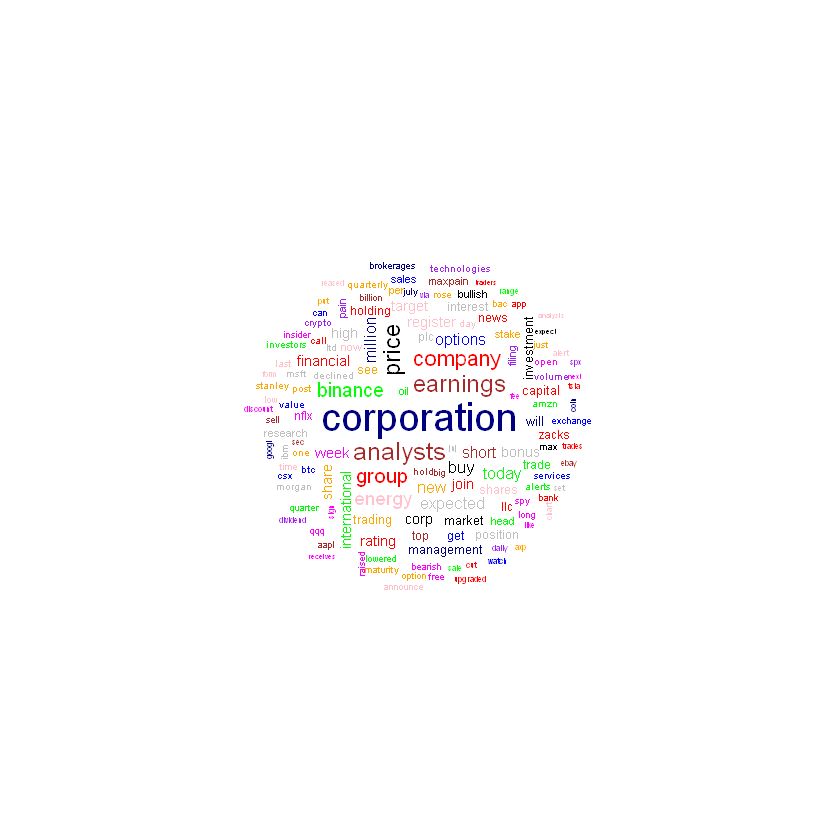

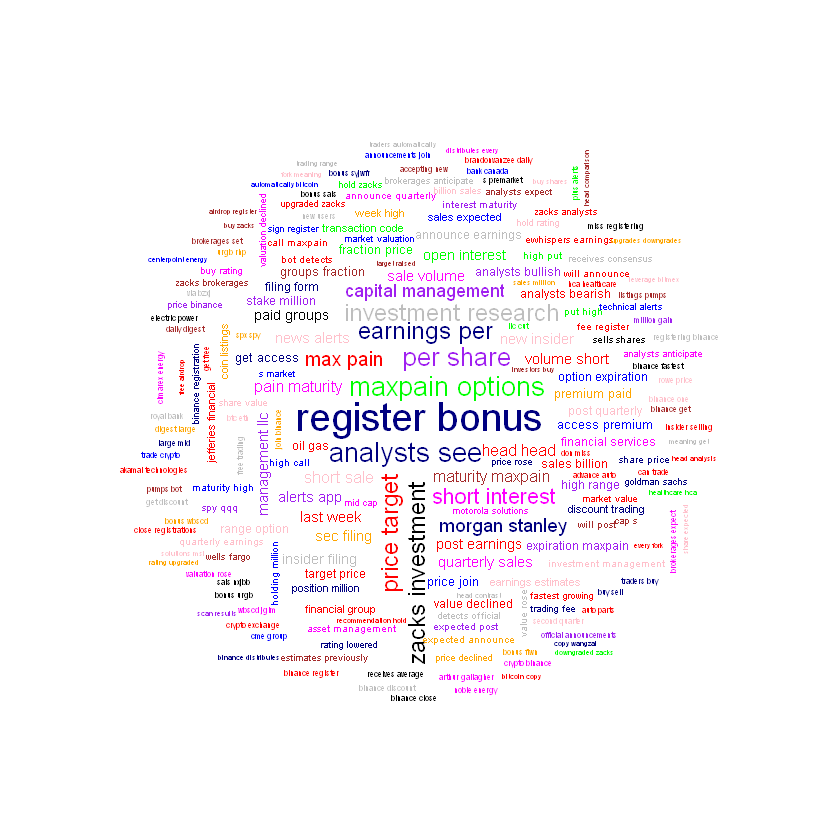

In [54]:
colorlist = c("red","blue","green","red","pink","orange","grey","black","brown","navy","magenta","purple")
wordcloud(names(ftweets_dtm_freq_1),ftweets_dtm_freq_1, random.order = F, random.color = T, colors = colorlist,scale=c(2,.25))
wordcloud(names(ftweets_dtm_freq_2),ftweets_dtm_freq_2, random.order = F, random.color = T, colors = colorlist,scale=c(2,.25))

In [64]:
stockerbot_url <- as.data.frame((str_subset(unlist(rm_url(stockerbot$url,extract = TRUE)),"://")))
names(stockerbot_url) <- c("stockerbot url")
head(stockerbot_url)

stockerbot url
<fct>
https://twitter.com/i/web/status/1019696670777503745
https://twitter.com/i/web/status/1019709091038547968
https://buff.ly/2L3kmc4
https://twitter.com/i/web/status/1019716662587740160
http://on.forbes.com/6013DqDDU
http://bit.ly/2NrYxje


In [66]:
head(data.frame(stockerbot$source),10)

stockerbot.source
<fct>
GoldmanSachs
StockTwits
TheStreet
MarketWatch
Forbes
jimcramer
ianbremmer
Reuters
TechCrunch
